### Import Datasets
The dataset is loaded from the specified directory, and the toal number of classes is determined

In [1]:
import os
images_classes_path = './Extracted_Training_data'
image_classes_list = os.listdir(images_classes_path)
num_classes = len(image_classes_list)
print("total {} classes".format(num_classes))

import cv2 as cv

test_images_path = 'output'
images_dict = {}
image_name_list = os.listdir(test_images_path)
# print(image_name_list)
for image_folder in image_name_list:
    images_dict[image_folder] = []
    images_path = os.path.join(test_images_path, image_folder)
    for image in os.listdir(images_path):
        path_to_coin_image = os.path.join(images_path, image)
        images_dict[image_folder].append(path_to_coin_image)

print(len(images_dict["L0000000"]))
 
num_images = len(image_name_list)
print("total {} test images".format(num_images))

total 16 classes
7
total 162 test images


In [33]:
import os
import cv2 as cv
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min

def extract_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

# Extract features for all images
image_paths = []
features = []

for folder, images in images_dict.items():
    for img_path in images:
        image_paths.append(img_path)
        features.append(extract_features(img_path))

features = np.array(features)

# Apply k-means clustering
num_clusters = 2  # Assuming we want to separate coins and non-coins
kmeans = KMeans(n_clusters=num_clusters, random_state=42).fit(features)

# Determine the closest images to cluster centers
closest, _ = pairwise_distances_argmin_min(kmeans.cluster_centers_, features)

# Assuming the largest cluster is coins, identify outliers
labels = kmeans.labels_
counts = np.bincount(labels)
coin_cluster = np.argmax(counts)

outliers = [image_paths[i] for i in range(len(labels)) if labels[i] != coin_cluster]

# Filter out non-coin images
filtered_images_dict = {folder: [] for folder in images_dict}
for img_path in image_paths:
    if img_path not in outliers:
        folder = os.path.basename(os.path.dirname(img_path))
        filtered_images_dict[folder].append(img_path)

# Print the filtered results
for folder, images in filtered_images_dict.items():
    print(f"Folder: {folder}, Number of coin images: {len(images)}")

# Optionally, save the filtered images to a new location
filtered_images_path = 'filtered_output'
os.makedirs(filtered_images_path, exist_ok=True)
filtered_dict = {}
for folder, images in filtered_images_dict.items():
    filtered_dict[folder] = []
    folder_path = os.path.join(filtered_images_path, folder)
    os.makedirs(folder_path, exist_ok=True)
    for img in images:
        img_name = os.path.basename(img)
        cv.imwrite(os.path.join(folder_path, img_name), cv.imread(img))
        filtered_dict[folder].append(os.path.join(folder_path, img_name))


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 83ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━

1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 123ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 104ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 91ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 94ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 119ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 87ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 84ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 93ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 81ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 96ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 80ms/step
1/1 ━━━━━

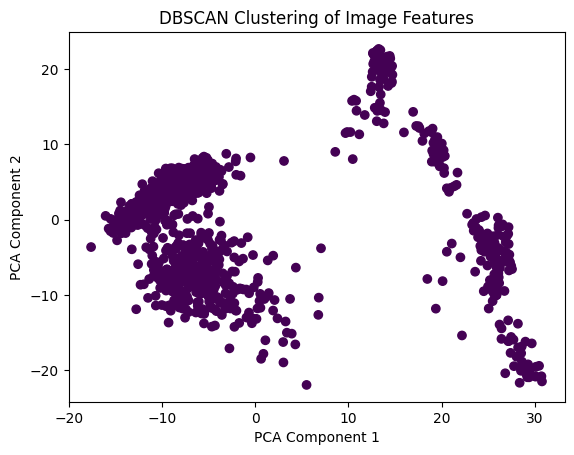

In [39]:
import os
import cv2 as cv
import numpy as np
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from tensorflow.keras.preprocessing import image
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN
import matplotlib.pyplot as plt

# Initialize the pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=False, pooling='avg')

def extract_features(image_path):
    img = image.load_img(image_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array)
    return features.flatten()

# Extract features for all images
image_paths = []
features = []

for folder, images in images_dict.items():
    for img_path in images:
        image_paths.append(img_path)
        features.append(extract_features(img_path))

features = np.array(features)

# Reduce dimensionality of the features
pca = PCA(n_components=50)
reduced_features = pca.fit_transform(features)

# Apply DBSCAN clustering
dbscan = DBSCAN(eps=0.5, min_samples=10)
labels = dbscan.fit_predict(reduced_features)

# Identify outliers (-1 label is considered as noise in DBSCAN)
outliers = [image_paths[i] for i in range(len(labels)) if labels[i] == -1]

# Filter out non-coin images
filtered_images_dict = {folder: [] for folder in images_dict}
for img_path in image_paths:
    if img_path not in outliers:
        folder = os.path.basename(os.path.dirname(img_path))
        filtered_images_dict[folder].append(img_path)

# Print the filtered results and the number of coins removed
print("\nFiltered counts of images per folder:")
for folder, images in filtered_images_dict.items():
    filtered_count = len(images)
    original_count = original_counts[folder]
    removed_count = original_count - filtered_count
    print(f"Folder: {folder}, Number of coin images: {filtered_count}, Number of coins removed: {removed_count}")

# Optionally, save the filtered images to a new location
filtered_images_path = 'filtered_output'
os.makedirs(filtered_images_path, exist_ok=True)
filtered_dict = {}
for folder, images in filtered_images_dict.items():
    filtered_dict[folder] = []
    folder_path = os.path.join(filtered_images_path, folder)
    os.makedirs(folder_path, exist_ok=True)
    for img in images:
        img_name = os.path.basename(img)
        cv.imwrite(os.path.join(folder_path, img_name), cv.imread(img))
        filtered_dict[folder].append(os.path.join(folder_path, img_name))

# Optional: visualize the clusters (for debugging purposes)
plt.scatter(reduced_features[:, 0], reduced_features[:, 1], c=labels)
plt.title("DBSCAN Clustering of Image Features")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.show()

In [56]:
import os
import numpy as np
import cv2 as cv
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D
from tensorflow.keras.models import Model
from tensorflow.keras.preprocessing import image
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_dir = augmented_data_path

# Data generators for training with shuffling
train_datagen = ImageDataGenerator(preprocessing_function=lambda x: x / 255.0, validation_split=0.2)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='input',
    subset='training',
    shuffle=True
)
validation_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(128, 128),
    batch_size=32,
    class_mode='input',
    subset='validation',
    shuffle=True
)


original_counts = {}
for folder, images in images_dict.items():
    original_counts[folder] = len(images)

def load_images(image_paths, target_size=(128, 128)):
    data = []
    for img_path in image_paths:
        img = image.load_img(img_path, target_size=target_size)
        img_array = image.img_to_array(img)
        img_array = img_array.astype('float32') / 255.0
        data.append(img_array)
    return np.array(data)

# Collect all coin images for training the autoencoder
all_images = []
for images in images_dict.values():
    all_images.extend(images)

# Load and preprocess the images
data = load_images(all_images)

# Define the autoencoder model
input_img = Input(shape=(128, 128, 3))

# Encoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img)
x = MaxPooling2D((2, 2), padding='same')(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = MaxPooling2D((2, 2), padding='same')(x)

# Decoder
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
x = Conv2D(32, (3, 3), activation='relu', padding='same')(x)
x = UpSampling2D((2, 2))(x)
decoded = Conv2D(3, (3, 3), activation='sigmoid', padding='same')(x)

autoencoder = Model(input_img, decoded)
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

# Train the autoencoder
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
autoencoder.fit(train_generator, epochs=200, validation_data=validation_generator, callbacks=[early_stopping])


def is_coin(image_path, threshold=0.02):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    reconstructed = autoencoder.predict(img_array)
    reconstruction_error = np.mean((img_array - reconstructed) ** 2)
    
    return reconstruction_error < threshold

# Filter out non-coin images
filtered_images_dict = {folder: [] for folder in images_dict}
for folder, images in images_dict.items():
    for img_path in images:
        if is_coin(img_path):
            filtered_images_dict[folder].append(img_path)

# Print the filtered results and the number of coins removed
print("\nFiltered counts of images per folder:")
for folder, images in filtered_images_dict.items():
    filtered_count = len(images)
    original_count = original_counts[folder]
    removed_count = original_count - filtered_count
    print(f"Folder: {folder}, Number of coin images: {filtered_count}, Number of coins removed: {removed_count}")

# Optionally, save the filtered images to a new location
filtered_images_path = 'filtered_output'
os.makedirs(filtered_images_path, exist_ok=True)
filtered_dict = {}
for folder, images in filtered_images_dict.items():
    filtered_dict[folder] = []
    folder_path = os.path.join(filtered_images_path, folder)
    os.makedirs(folder_path, exist_ok=True)
    for img in images:
        img_name = os.path.basename(img)
        cv.imwrite(os.path.join(folder_path, img_name), cv.imread(img))
        filtered_dict[folder].append(os.path.join(folder_path, img_name))

Found 922 images belonging to 16 classes.
Found 221 images belonging to 16 classes.
Epoch 1/200


c:\Users\katla\miniconda3\envs\iapr\lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


29/29 ━━━━━━━━━━━━━━━━━━━━ 15s 409ms/step - loss: 0.6588 - val_loss: 0.6216
Epoch 2/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 306ms/step - loss: 0.6164 - val_loss: 0.6158
Epoch 3/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 293ms/step - loss: 0.6099 - val_loss: 0.6085
Epoch 4/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 288ms/step - loss: 0.6024 - val_loss: 0.6041
Epoch 5/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 310ms/step - loss: 0.6012 - val_loss: 0.6026
Epoch 6/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 9s 307ms/step - loss: 0.6018 - val_loss: 0.6016
Epoch 7/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 326ms/step - loss: 0.5982 - val_loss: 0.6033
Epoch 8/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 326ms/step - loss: 0.5981 - val_loss: 0.6006
Epoch 9/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 329ms/step - loss: 0.5954 - val_loss: 0.5998
Epoch 10/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 333ms/step - loss: 0.5954 - val_loss: 0.5993
Epoch 11/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 11s 339ms/step - loss: 0.5949 - val_loss: 0.5991
Epoch 12/200
29/29 ━━━━━━━━━━━━━━━━━━━━ 10s 30

In [57]:
# Print original counts
print("Original counts of images per folder:")
original_counts = {}
for folder, images in images_dict.items():
    original_counts[folder] = len(images)
    # print(f"Folder: {folder}, Number of images: {len(images)}")

# Print the filtered results and the number of coins removed
print("\nFiltered counts of images per folder:")
for folder, images in filtered_images_dict.items():
    filtered_count = len(images)
    original_count = original_counts[folder]
    removed_count = original_count - filtered_count
    print(f"Folder: {folder}, Number of coin images: {filtered_count}, Number of coins removed: {removed_count}")


Original counts of images per folder:

Filtered counts of images per folder:
Folder: L0000000, Number of coin images: 7, Number of coins removed: 0
Folder: L0000001, Number of coin images: 10, Number of coins removed: 0
Folder: L0000002, Number of coin images: 6, Number of coins removed: 0
Folder: L0000003, Number of coin images: 9, Number of coins removed: 0
Folder: L0000004, Number of coin images: 7, Number of coins removed: 0
Folder: L0000005, Number of coin images: 9, Number of coins removed: 0
Folder: L0000006, Number of coin images: 10, Number of coins removed: 0
Folder: L0000007, Number of coin images: 10, Number of coins removed: 0
Folder: L0000008, Number of coin images: 4, Number of coins removed: 0
Folder: L0000009, Number of coin images: 3, Number of coins removed: 0
Folder: L0000010, Number of coin images: 7, Number of coins removed: 0
Folder: L0000011, Number of coin images: 8, Number of coins removed: 0
Folder: L0000012, Number of coin images: 7, Number of coins removed:

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


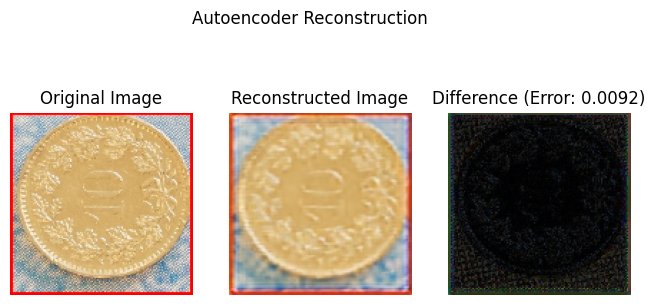

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


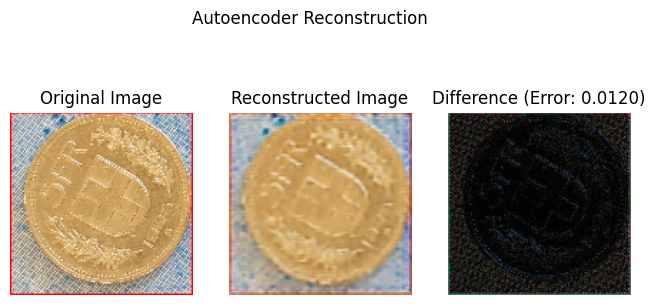

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


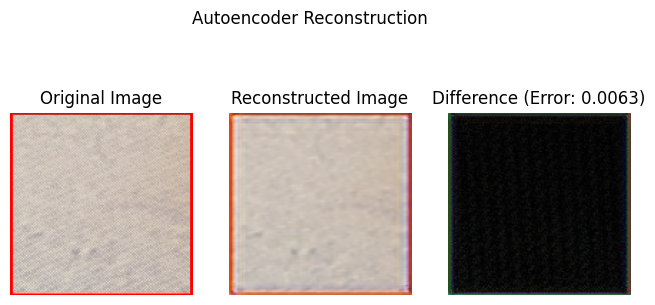

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


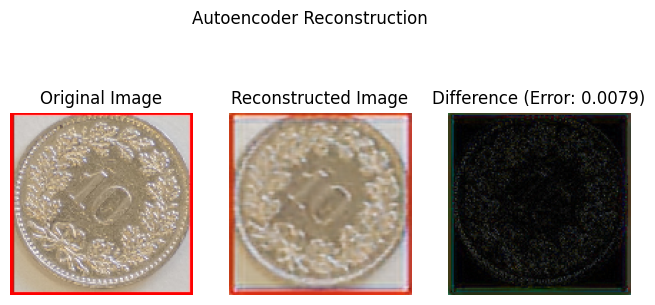

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


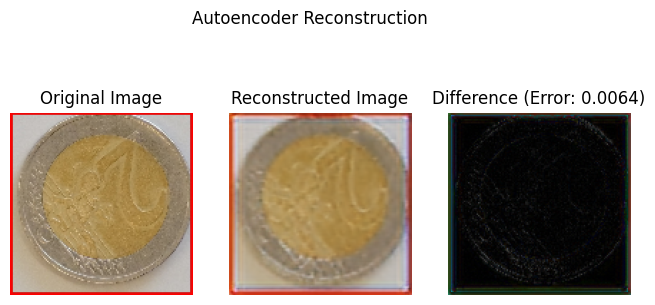

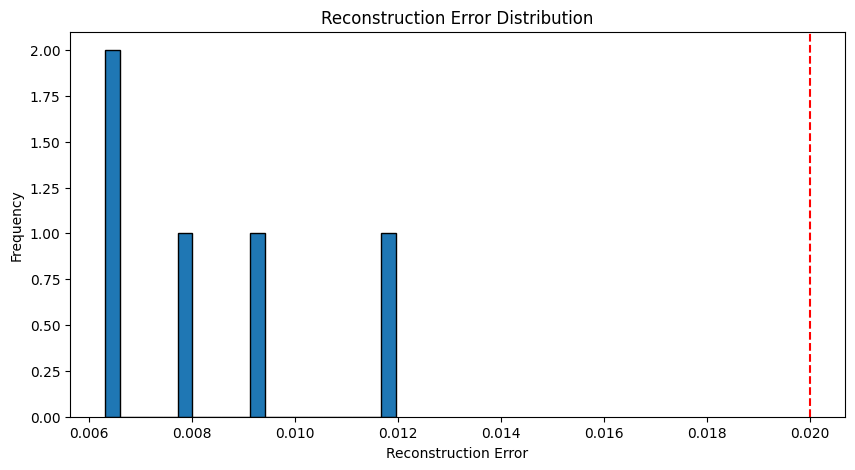

In [68]:
def plot_reconstruction(image_path, model, threshold):
    img = image.load_img(image_path, target_size=(128, 128))
    img_array = image.img_to_array(img)
    img_array = img_array.astype('float32') / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    reconstructed = model.predict(img_array)
    reconstruction_error = np.mean((img_array - reconstructed) ** 2)
    
    plt.figure(figsize=(8, 4))
    
    # Original Image
    plt.subplot(1, 3, 1)
    plt.title("Original Image")
    plt.imshow(img_array[0])
    plt.axis('off')
    
    # Reconstructed Image
    plt.subplot(1, 3, 2)
    plt.title("Reconstructed Image")
    plt.imshow(reconstructed[0])
    plt.axis('off')
    
    # Difference Image
    plt.subplot(1, 3, 3)
    plt.title(f"Difference (Error: {reconstruction_error:.4f})")
    difference = np.abs(img_array - reconstructed)
    plt.imshow(difference[0])
    plt.axis('off')
    
    plt.suptitle("Autoencoder Reconstruction")
    plt.show()
    
    return reconstruction_error


# Visualize a few examples
example_images = np.random.choice(all_images, 5, replace=False)
threshold = 0.02
errors = []

for img_path in example_images:
    error = plot_reconstruction(img_path, autoencoder, threshold)
    errors.append(error)

# Plot reconstruction errors
plt.figure(figsize=(10, 5))
plt.hist(errors, bins=20, edgecolor='k')
plt.axvline(x=threshold, color='r', linestyle='--')
plt.title("Reconstruction Error Distribution")
plt.xlabel("Reconstruction Error")
plt.ylabel("Frequency")
plt.show()


## Data Import and Preprocessing

In [2]:
# Load the TensorBoard notebook extension
%load_ext tensorboard
import datetime
!rm -rf ./logs/

%matplotlib inline
import matplotlib.pyplot as plt
from PIL import Image
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
import matplotlib.image as mpimg
import numpy as np


'rm' is not recognized as an internal or external command,
operable program or batch file.


## Prerpocessing

In [3]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import random

In [54]:
import os
from tqdm import tqdm
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

# Create the directories to save the augmented images
augmented_data_path = 'augmented_images'
os.makedirs(augmented_data_path, exist_ok=True)

crazy_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    brightness_range=[0.9, 1.1],
    horizontal_flip=True,
    vertical_flip=True
)


In [55]:

# Set the number of augmented images to generate per original image
num_augmented_images = 3

# Load the original images
original_data_path = images_classes_path

# Calculate the total number of files
all_files = sum([len(files) for r, d, files in os.walk(original_data_path)])
pbar = tqdm(total=all_files * num_augmented_images, desc="Augmenting images")

for class_dir in os.listdir(original_data_path):
    class_path = os.path.join(original_data_path, class_dir)
    save_class_path = os.path.join(augmented_data_path, class_dir)
    os.makedirs(save_class_path, exist_ok=True)
    
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path)
        x = img_to_array(img)
        x = x.reshape((1,) + x.shape)
        
        # Generate and save augmented images
        i = 0
        for batch in crazy_datagen.flow(x, batch_size=1, save_to_dir=save_class_path, save_prefix='aug', save_format='jpeg'):
            i += 1
            pbar.update(1)
            if i >= num_augmented_images:
                break

pbar.close()

Augmenting images:   0%|          | 0/1149 [00:00<?, ?it/s]

Augmenting images: 100%|██████████| 1149/1149 [01:18<00:00, 14.67it/s]


In [23]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.3
)


crazy_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    brightness_range=[0.8, 1.2],
    horizontal_flip=True,
    vertical_flip=True,
    validation_split=0.3
)


train_generator = datagen.flow_from_directory(
    augmented_data_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=True,
    subset="training"
)

val_generator = datagen.flow_from_directory(
    augmented_data_path,
    target_size=(224, 224),
    batch_size=16,
    class_mode='categorical',
    shuffle=False, 
    subset='validation'
)


test_datagen=ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
    test_images_path,
    target_size=(224, 224),
    shuffle=False,
    batch_size=1,
    class_mode='categorical'
)

filenames = test_generator.filenames
nb_samples= len(filenames)

x_batch, y_batch = next(train_generator)
print(f"Batch x_shape: {x_batch.shape}, Batch y_shape: {y_batch.shape}")

# Verify the data generators
train_batch = next(iter(train_generator))
val_batch = next(iter(val_generator))
print(train_batch[0].shape, train_batch[1].shape)
print(val_batch[0].shape, val_batch[1].shape)

print(f"Steps per epoch: {train_generator.samples // train_generator.batch_size}")
print(f"Validation steps: {val_generator.samples // val_generator.batch_size}")


Found 809 images belonging to 16 classes.
Found 336 images belonging to 16 classes.
Found 1068 images belonging to 162 classes.
Batch x_shape: (16, 224, 224, 3), Batch y_shape: (16, 16)
(16, 224, 224, 3) (16, 16)
(16, 224, 224, 3) (16, 16)
Steps per epoch: 50
Validation steps: 21


## Model configuration

In [7]:
import keras
from keras.layers import Input
from keras.models import Sequential, Model
from keras.optimizers import SGD, Adam

from keras.layers import Dense, Activation, Dropout, Flatten
from keras.layers import Conv2D
from keras.layers import MaxPooling2D, GlobalAveragePooling2D, BatchNormalization

## Using Inception V3

In [8]:
from keras.applications.inception_v3 import InceptionV3

In [ ]:
inceptionv3_base = InceptionV3(include_top=False, # Since we will create our own
                    weights='imagenet', 
                    input_shape=(224, 224, 3))
# inceptionv3_base.summary()

### Fine-tuning the model

In [10]:
x = inceptionv3_base.output
x = Flatten()(x)
# x = BatchNormalization()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(rate = .5)(x)
predictions = Dense(num_classes, activation='softmax')(x)

In [ ]:
model = Model(inputs=inceptionv3_base.inputs, outputs=predictions)
# model.summary()

### Transfer Learning

In [ ]:
## Freezing in order to only train the last 7 layers
for layer in model.layers[:]:
    layer.trainable = True
for layer in model.layers[:-7]:
    layer.trainable = False
for i, layer in enumerate(model.layers):
    print(i, layer.name, layer.trainable)
# model.summary()


In [24]:
optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer,
              loss="categorical_crossentropy",
              metrics=["accuracy"])

## Train the model

In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import TensorBoard

In [26]:
checkpoint = ModelCheckpoint('model.keras',
                             monitor='val_acc',
                             verbose=1,
                             save_best_only=True,
                             mode='max')
log_dir = "logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = TensorBoard(log_dir=log_dir, histogram_freq=1)
early_stopping_callback = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=6, restore_best_weights=True)


my_callbacks = [checkpoint, tensorboard_callback, early_stopping_callback]

In [27]:
history = model.fit(train_generator,
          validation_data=val_generator,
          epochs=100,
          callbacks=my_callbacks)
print('Training done!')

Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 216s 3s/step - accuracy: 0.1784 - loss: 3.0269 - val_accuracy: 0.4048 - val_loss: 1.8730
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 168s 3s/step - accuracy: 0.6458 - loss: 1.2043 - val_accuracy: 0.5744 - val_loss: 1.2867
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.7994 - loss: 0.6712 - val_accuracy: 0.6637 - val_loss: 1.0093
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 175s 3s/step - accuracy: 0.8931 - loss: 0.3547 - val_accuracy: 0.7887 - val_loss: 0.6511
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.9494 - loss: 0.1931 - val_accuracy: 0.8006 - val_loss: 0.5987
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 182s 4s/step - accuracy: 0.9561 - loss: 0.1554 - val_accuracy: 0.8036 - val_loss: 0.6796
Epoch 7/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 173s 3s/step - accuracy: 0.9392 - loss: 0.1975 - val_accuracy: 0.8006 - val_loss: 0.7194
Epoch 8/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 180s 4s/step - accuracy: 0.9562 - loss: 0.1296 - val_accuracy: 0.

In [29]:
for layer in model.layers[:]:
    layer.trainable = True

In [18]:
params = model.fit(train_generator, 
                                validation_data=val_generator, 
                                epochs=10,
                                callbacks=my_callbacks)

Epoch 1/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 23s 1s/step - accuracy: 1.0000 - loss: 0.0154 - val_accuracy: 0.6389 - val_loss: 1.1880
Epoch 2/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.9899 - loss: 0.0232 - val_accuracy: 0.6574 - val_loss: 1.0723
Epoch 3/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.9915 - loss: 0.0153 - val_accuracy: 0.6296 - val_loss: 1.2743
Epoch 4/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 27s 2s/step - accuracy: 0.9984 - loss: 0.0295 - val_accuracy: 0.5463 - val_loss: 2.2533
Epoch 5/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 29s 2s/step - accuracy: 0.8485 - loss: 0.3550 - val_accuracy: 0.6111 - val_loss: 1.5799
Epoch 6/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 25s 1s/step - accuracy: 0.8605 - loss: 0.6376 - val_accuracy: 0.6204 - val_loss: 1.8254
Epoch 7/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 24s 1s/step - accuracy: 0.8903 - loss: 0.3705 - val_accuracy: 0.6019 - val_loss: 1.2504
Epoch 8/10
18/18 ━━━━━━━━━━━━━━━━━━━━ 26s 1s/step - accuracy: 0.9594 - loss: 0.1475 - val_accuracy: 0.6667 - val_loss:

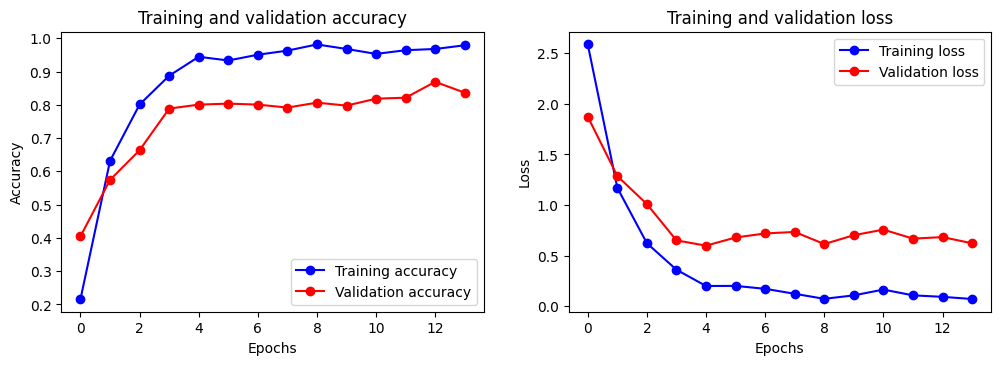

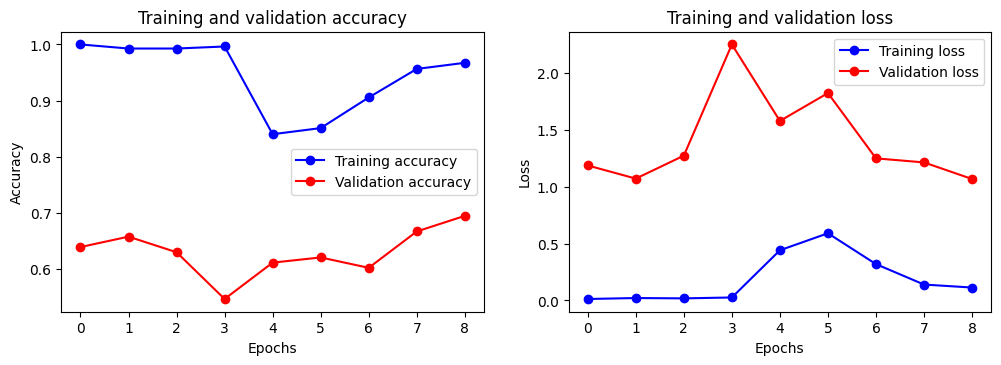

In [30]:

def plot_history(history):
    acc = np.array(history.history['accuracy'])
    val_acc = np.array(history.history['val_accuracy'])
    loss = np.array(history.history['loss'])
    val_loss = np.array(history.history['val_loss'])

    epochs = range(len(acc))

    plt.figure(figsize=(12, 8))

    # Plot training and validation accuracy
    plt.subplot(2, 2, 1)
    plt.plot(epochs, acc, 'bo-', label='Training accuracy')
    plt.plot(epochs, val_acc, 'ro-', label='Validation accuracy')
    plt.title('Training and validation accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    # Plot training and validation loss
    plt.subplot(2, 2, 2)
    plt.plot(epochs, loss, 'bo-', label='Training loss')
    plt.plot(epochs, val_loss, 'ro-', label='Validation loss')
    plt.title('Training and validation loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

# Example usage:
# Assuming 'history' is the History object returned from model.fit
plot_history(history)
plot_history(params)

In [ ]:
%tensorboard --logdir logs/fit

In [ ]:
import os
import time
import subprocess
from IPython.display import display, HTML

os.system('pkill -f "tensorboard"')
subprocess.Popen(["tensorboard", "--logdir", "logs/fit"])
time.sleep(5)
display(HTML(f'<a href="http://localhost:6006" target="_blank">Open TensorBoard</a>'))

## Test model on real images


In [ ]:
def predict_images(path):
    # Load and display the image
    img = mpimg.imread(path)
    plt.imshow(img)
    plt.axis('off')  # Hide axis
    plt.show()

    # Preprocess the image
    image = Image.open(path)
    image = image.convert('RGB')
    image = image.resize((224, 224))
    image = np.array(image) / 255.0  # Normalize the image
    image = np.expand_dims(image, axis=0)  # Expand dimensions to fit model input

    # Predict the probabilities
    probabilities = model.predict(image)

    # Get class labels
    class_labels = {v: k for k, v in val_generator.class_indices.items()}

    # Prepare data for a nice display
    sorted_indices = np.argsort(probabilities[0])[::-1]
    results = [(class_labels[i], probabilities[0][i]) for i in sorted_indices]

    # Print sorted probabilities and their corresponding class labels
    print("Class".ljust(15), "Probability")
    print("-" * 30)
    for label, prob in results:
        print(f"{label.ljust(15)} : {prob:.4f}")

# # Example usage
# for key in images_dict:
#     # List
#     for coin_path in images_dict[key]:
#         print(coin_path)
#         predict_images(coin_path)

# Example usage on filtered
for key in filtered_dict:
    # List
    for coin_path in images_dict[key]:
        print(coin_path)
        predict_images(coin_path)

# predict_images('./Extracted_Training_Data/0.1CHF/L1010279_3.JPG')

## Confustion matrix on validation set

In [65]:
import pandas as pd
import seaborn as sns

Y_pred = model.predict(val_generator, 1167//32+1)
y_pred = np.argmax(Y_pred, axis=1)
cfm = confusion_matrix(val_generator.classes, y_pred)
cfm = np.around(cfm.astype('float')/cfm.sum(axis=1)[:, np.newaxis], decimals=2)
classes = ['0.1CHF', '0.1EUR', '0.01EUR', '0.2CHF', '0.2EUR', '0.02EUR', '0.5CHF', '0.05CHF', '0.5EUR', '0.05EUR', '1CHF', '1EUR', '2CHF', '2EUR', '5CHF', 'OOD']
cfm_pd = pd.DataFrame(cfm, index = classes, columns = classes)
figure = plt.figure(figsize=(8,8))
sns.heatmap(cfm_pd, annot=True, cmap=plt.cm.Blues)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: 'augmented_images\\0.01EUR\\aug_0_129.jpeg'